In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('twentyeleven.csv')
df = df.drop_duplicates(ignore_index = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [3]:
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['date'] = pd.to_datetime(df['date'])

In [5]:
df['InvoiceDate'].dt.isocalendar().week

0          1
1          1
2          1
3          1
4          1
          ..
484325    49
484326    49
484327    49
484328    49
484329    49
Name: week, Length: 484330, dtype: UInt32

In [6]:
df['InvoiceDate'].dt.weekday

0         1
1         1
2         1
3         1
4         1
         ..
484325    4
484326    4
484327    4
484328    4
484329    4
Name: InvoiceDate, Length: 484330, dtype: int32

In [7]:
df['InvoiceDate'].dt.month

0          1
1          1
2          1
3          1
4          1
          ..
484325    12
484326    12
484327    12
484328    12
484329    12
Name: InvoiceDate, Length: 484330, dtype: int32

In [8]:
df['InvoiceDate'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
484325    2011
484326    2011
484327    2011
484328    2011
484329    2011
Name: InvoiceDate, Length: 484330, dtype: int32

In [9]:
df['month-year'] = df['InvoiceDate'].dt.strftime('%B-%Y')
df['month-year']

0          January-2011
1          January-2011
2          January-2011
3          January-2011
4          January-2011
              ...      
484325    December-2011
484326    December-2011
484327    December-2011
484328    December-2011
484329    December-2011
Name: month-year, Length: 484330, dtype: object

In [10]:
df['date'] = df['InvoiceDate'].dt.strftime('%d-%m-%Y')
df['date']

0         04-01-2011
1         04-01-2011
2         04-01-2011
3         04-01-2011
4         04-01-2011
             ...    
484325    09-12-2011
484326    09-12-2011
484327    09-12-2011
484328    09-12-2011
484329    09-12-2011
Name: date, Length: 484330, dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 484330 entries, 0 to 484329
Series name: date
Non-Null Count   Dtype         
--------------   -----         
484330 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 MB


In [12]:
max_date = df['date'].max()
max_date

Timestamp('2011-12-09 00:00:00')

In [13]:
df_grouped = df.groupby(by = 'Customer ID').agg(last_purchase_date = ('date','max'))

In [14]:
df_grouped['recency'] = max_date - df_grouped['last_purchase_date']
df_grouped['recency'] = df_grouped['recency'].astype('str')
df_grouped['recency'] = df_grouped['recency'].str.replace(' days','').astype('int')

(array([1787.,  766.,  434.,  235.,  188.,  199.,  160.,  186.,  138.,
         126.]),
 array([  0. ,  33.9,  67.8, 101.7, 135.6, 169.5, 203.4, 237.3, 271.2,
        305.1, 339. ]),
 <BarContainer object of 10 artists>)

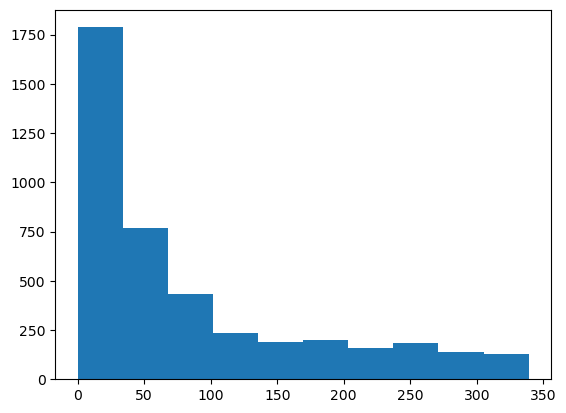

In [15]:
import matplotlib.pyplot as plt

plt.hist(df_grouped['recency'])

In [16]:
sales_per_day = df.groupby(by = 'date', axis = 0, as_index = True).agg(daily_sales = ('Quantity','sum'))
sales_per_day

C:\Users\thanh\AppData\Local\Temp\ipykernel_9484\247135740.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  sales_per_day = df.groupby(by = 'date', axis = 0, as_index = True).agg(daily_sales = ('Quantity','sum'))


,daily_sales
date,
2011-01-04,8630
2011-01-05,19769
2011-01-06,23174
2011-01-07,17160
2011-01-09,8125
...,...
2011-12-05,44568
2011-12-06,30377
2011-12-07,41844


<Axes: xlabel='date'>

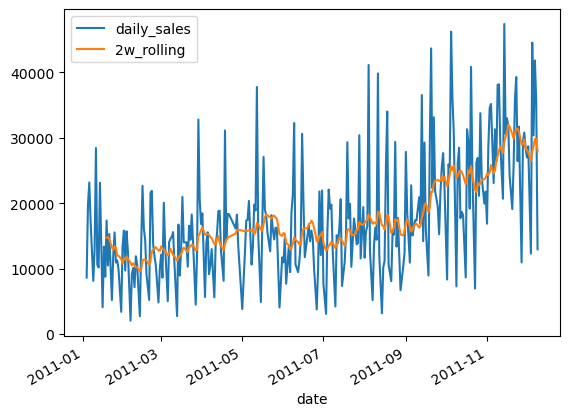

In [17]:
sales_per_day['2w_rolling'] = sales_per_day['daily_sales'].rolling(window = 14).mean()
sales_per_day.plot()

<Axes: xlabel='date'>

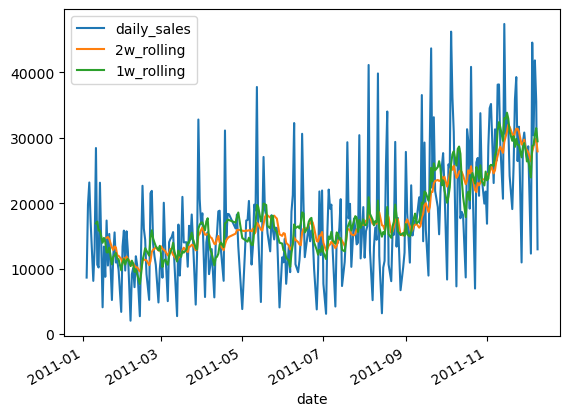

In [18]:
sales_per_day['1w_rolling'] = sales_per_day['daily_sales'].rolling(window = 7).mean()
sales_per_day.plot()

<Axes: xlabel='date'>

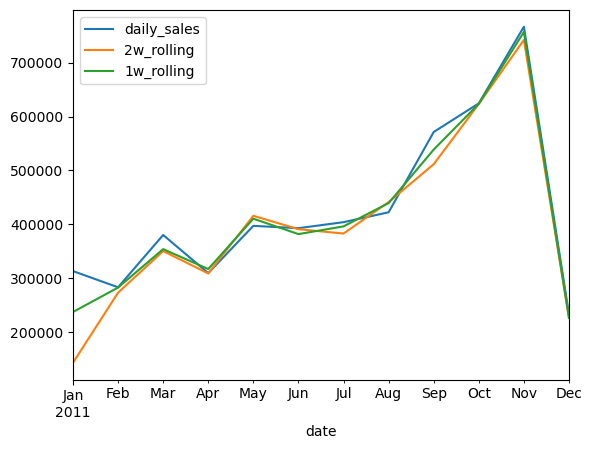

In [19]:
sales_per_day.resample('M').sum().plot()